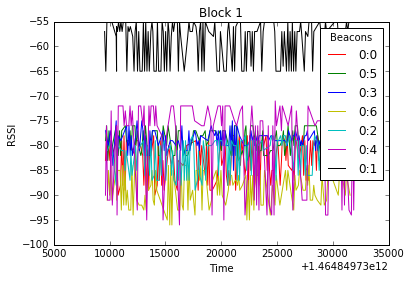

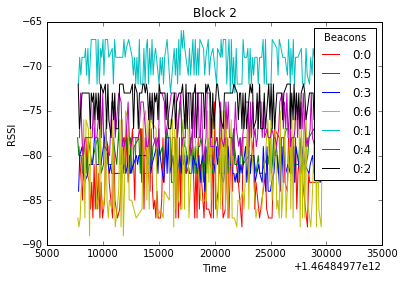

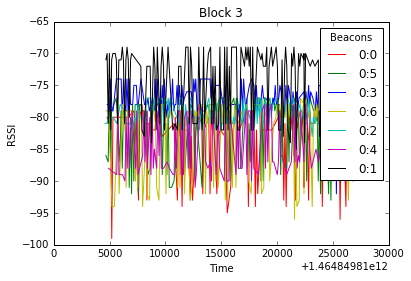

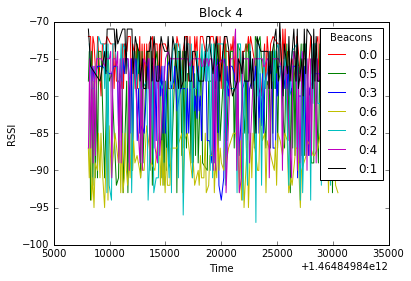

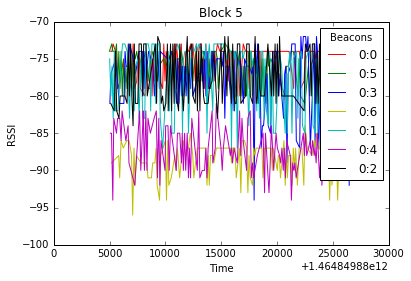

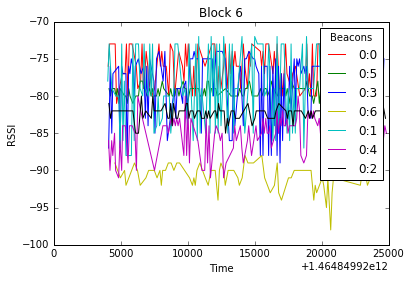

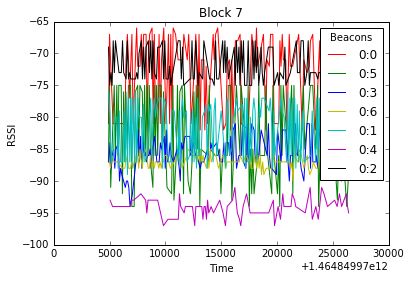

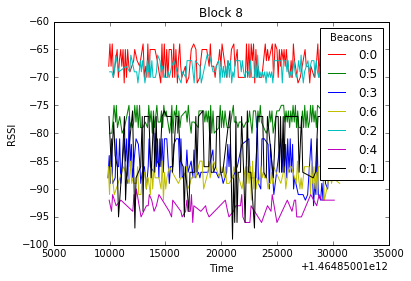

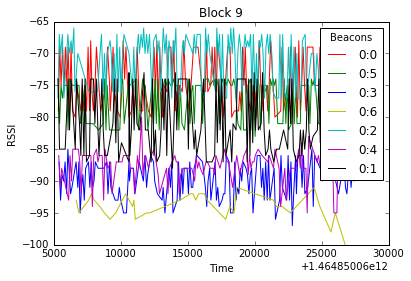

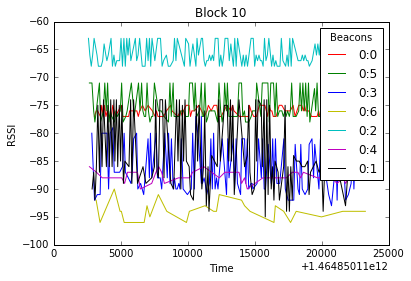

In [3]:
import json
import matplotlib
import matplotlib.pyplot as plt
import itertools

class Data(object):  # each data object contains a time and rssi value
    
    def __init__(self):
        self.time = 0
        self.rssi = 0

begin = False
blockNum = 1  # start off at 1
beaconNum = "0:0"
allBeacons = {}  # dictionary of every beacon in a block

def plotBlock(block):
    global allBeacons
    x = []
    y = []
    colors = itertools.cycle(["r", "g", "b", "y", "c", "m", "k"])
    get_ipython().magic('matplotlib inline')
    for currBeacon in allBeacons:  # loop thru each beacon
        for i in range(0, len(allBeacons[currBeacon])-1):  # loop thru each Data object in currBeacon
            x.append(int(allBeacons[currBeacon][i].time))
            y.append(int(allBeacons[currBeacon][i].rssi))
        plt.plot(x, y, linestyle='-', label=currBeacon, color=next(colors))
        x.clear()  # reset x array for next beacon
        y.clear()  # reset y array for next beacon
    # format plot
    plt.title("Block " + str(block))
    plt.xlabel("Time")
    plt.ylabel("RSSI")
    plt.legend(title="Beacons")
    plt.show()  

def main():
    global begin
    global blockNum
    global beaconNum
    global allBeacons

    f = open("2_6_2016_1441.txt")  # open text file
    for line in f:
        words = line.split()
        time = words[0]  # get time
        json_string = words[1]  # get json text
        parsed_json = json.loads(json_string)  # parse json
        if parsed_json.get('marker'):  # check if marker
            if (parsed_json['marker'] == 'begin\n'):
                begin = True  # begin block
            elif (parsed_json.get('marker') == 'end\n'):
                oldBegin = begin
                begin = False  # end block
                if (oldBegin == True):  # ensures that we have reached the first end after a begin
                    plotBlock(blockNum)
                blockNum += 1  # increment which block number we are on
                allBeacons.clear()  # resets allBeacons dictionary for next block
        elif parsed_json.get('node') and begin == True:  # check if node and if in block
            beaconNum = str(parsed_json['major']) + ":" + str(parsed_json['minor'])  # beacon identified by major and minor
            rssi = str(parsed_json['rssi'])
            allBeacons.setdefault(beaconNum, []).append(Data())  # each beacon has an array of Data
            dataPos = len(allBeacons[beaconNum])  # number of Data objects a specific beaconNum has
            allBeacons[beaconNum][dataPos - 1].time = time  # dataPos - 1 = position in array
            allBeacons[beaconNum][dataPos - 1].rssi = rssi
    
    f.close()  # close file
        
if __name__ == "__main__":
    main()